In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests

In [2]:
raw_faction_data = requests.request(url="https://netrunnerdb.com/api/2.0/public/cards",method="GET").json()['data']
cards_df = pd.DataFrame(raw_faction_data)
id_df = cards_df[cards_df["type_code"] == "identity"].groupby(['stripped_title','faction_code']).size().reset_index()[['stripped_title','faction_code']]

faction_hues = {
    'shaper':'limegreen',
    'criminal':'royalblue',
    'anarch':'orangered',
    'adam':'gold',
    'jinteki':'crimson',
    'nbn':'darkorange',
    'haas-bioroid':'blueviolet',
    'weyland-consortium':'darkgreen'
}

In [3]:
trashorbusto_data = requests.request(url="https://trash-or-busto.herokuapp.com/api/rankings",method="GET").json()

In [12]:
corp_data = pd.DataFrame(trashorbusto_data['corp_cards'])
corp_card_data = pd.merge(corp_data[['nrdb_key','rating']], cards_df, how="left", left_on="nrdb_key", right_on="code")

In [31]:
corp_card_data[corp_card_data['keywords'].str.contains("Barrier",na=False)]

,nrdb_key,rating,code,deck_limit,faction_code,faction_cost,flavor,illustrator,influence_limit,keywords,...,title,type_code,uniqueness,base_link,cost,memory_cost,strength,advancement_cost,agenda_points,trash_cost
10,28005,2005.356493,28005,3,weyland-consortium,3,<strong>Designed by 2016 World Champion Chris ...,NtscapeNavigator,NaN,Barrier,...,Border Control,ice,False,NaN,4.0,NaN,1.0,NaN,NaN,NaN
18,12013,1966.033744,12013,3,jinteki,3,"""The ultimate aim of martial arts is not havin...",Adam S. Doyle,NaN,Barrier - AP,...,Kakugo,ice,False,NaN,4.0,NaN,1.0,NaN,NaN,NaN
31,26116,1923.629956,26116,3,nbn,3,[Pay 15 gems to access this content],N. Hopkins,NaN,Barrier,...,Gold Farmer,ice,False,NaN,3.0,NaN,1.0,NaN,NaN,NaN
76,10095,1838.107673,10095,3,neutral-corp,0,A brand new invention.,Seage,NaN,Barrier,...,Vanilla,ice,False,NaN,0.0,NaN,0.0,NaN,NaN,NaN
95,11094,1805.084172,11094,3,nbn,1,//Connection Terminated,Alexandr Elichev,NaN,Barrier - Tracer,...,IP Block,ice,False,NaN,2.0,NaN,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,02017,1294.748884,02017,3,nbn,1,A collection of cast-off cyberjunk. But it doe...,Ed Mattinian,NaN,Barrier,...,TMI,ice,False,NaN,3.0,NaN,5.0,NaN,NaN,NaN
778,06069,1288.530555,06069,3,weyland-consortium,2,NaN,Wylie Beckert,NaN,Barrier - Morph,...,Changeling,ice,False,NaN,5.0,NaN,4.0,NaN,NaN,NaN
817,02015,1269.325385,02015,3,jinteki,2,Sometimes uniqueness is overrated.,Mashuri,NaN,Barrier - Psi,...,Snowflake,ice,False,NaN,1.0,NaN,3.0,NaN,NaN,NaN
835,12040,1253.781750,12040,3,neutral-corp,0,"""All my best tricks were shrugged right off. I...",Shawn Ye Zhongyi,NaN,Barrier,...,Self-Adapting Code Wall,ice,False,NaN,3.0,NaN,1.0,NaN,NaN,NaN


<AxesSubplot: title={'center': 'rating'}, xlabel='faction_code'>

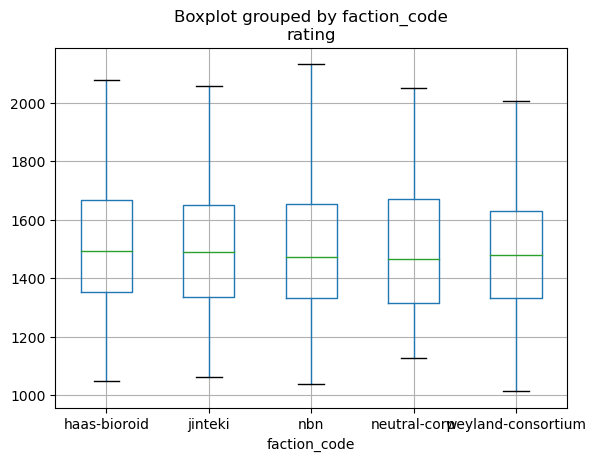

In [32]:
corp_card_data.boxplot('rating',by="faction_code")